In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
#önce overfitting yapıp sonra earlystopping ve dropout yapıcaz

In [3]:
df=pd.read_excel("maliciousornot.xlsx")
df

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
0,1,23.303047,13.445560,159.066933,1296.628667,0.153367,0.359585,0.388730,0.190544,0.313341,...,32.875560,22.448127,239.118533,2615.278000,0.210103,0.862174,0.922148,0.343781,0.595983,0.154015
1,1,26.645007,23.018073,172.149800,1717.612000,0.109767,0.101865,0.112564,0.090894,0.234714,...,32.370380,30.323753,205.698933,2533.672000,0.160362,0.241709,0.312953,240.932000,356.216667,0.115311
2,1,25.505113,27.525833,168.393333,1558.286000,0.141969,0.207124,0.255699,0.165673,0.268004,...,30.531007,33.069860,197.538333,2213.724667,0.187046,0.549869,0.583418,314.766000,0.468004,0.113445
3,1,14.792707,26.398893,100.491960,500.128200,0.184585,0.367745,0.312693,0.136269,0.336398,...,19.313420,34.326333,128.069607,735.360733,0.271761,1.122147,0.889764,0.333548,0.859842,224.092667
4,1,26.282313,18.575080,174.999533,1680.047333,0.129922,0.172020,256.476000,0.135103,0.234326,...,29.196813,21.593207,197.149733,2040.150000,0.177979,265.543333,0.518133,0.210492,0.306217,0.099456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,1,27.927387,29.002513,183.937333,1915.798000,143.782000,0.150129,0.315932,0.179922,0.223575,...,32.966233,34.196800,215.154867,2625.640667,182.642000,0.273704,0.531993,0.287046,266.838667,0.092163
544,1,26.075060,36.593167,169.947733,1633.415333,0.126684,0.133937,186.528000,0.126826,0.226942,...,30.686447,49.546500,200.776667,2242.222000,0.151036,0.248963,0.416450,0.210880,0.333160,0.085971
545,1,21.502533,36.372960,140.284600,1111.525533,0.109520,0.132513,0.119831,0.068679,205.958000,...,24.585427,44.196773,164.118733,1455.954667,0.147538,0.400776,0.440802,0.183678,0.287305,0.101295
546,1,26.683867,37.992127,181.476200,1638.596667,0.152590,358.807333,0.455180,196.890667,0.310491,...,33.341880,51.062040,239.118533,2358.802000,213.730000,1.124479,1.215929,343.263333,0.529403,160.621333


In [4]:
#type colonundaki verileri topla
y=df["Type"].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [5]:
#type dışında kalan tüm colonlardaki verileri topla
x=df.drop("Type",axis=1).values
x
#yukaridaki islemle type colonu düsürülmüsken kalan tüm verileri numpy array e cevirir ve x e atar

array([[2.33030467e+01, 1.34455600e+01, 1.59066933e+02, ...,
        3.43781467e-01, 5.95982867e-01, 1.54015133e-01],
       [2.66450067e+01, 2.30180733e+01, 1.72149800e+02, ...,
        2.40932000e+02, 3.56216667e+02, 1.15310573e-01],
       [2.55051133e+01, 2.75258333e+01, 1.68393333e+02, ...,
        3.14766000e+02, 4.68003933e-01, 1.13445293e-01],
       ...,
       [2.15025333e+01, 3.63729600e+01, 1.40284600e+02, ...,
        1.83678267e-01, 2.87304933e-01, 1.01295067e-01],
       [2.66838667e+01, 3.79921267e+01, 1.81476200e+02, ...,
        3.43263333e+02, 5.29402733e-01, 1.60621333e+02],
       [1.00517867e+01, 3.17874800e+01, 6.20723733e+01, ...,
        0.00000000e+00, 3.71890200e-01, 9.11785133e-02]])

In [6]:
#train ve test icin verileri böl
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=30)

In [7]:
#verileri üzerinde işlem yapmak icin scale edip kücültelim

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

scaler.fit(x_train)
#fit işlemini hallettik şimdi transforma gecelim

x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)


#veya asagidaki gibi fit ve transform islemini aynı anda da yapabiliriz
# x_train=scaler.fit_transform(x_train)
# x_test=scaler.fit_transform(x_test)


In [10]:
#earlystopping i ve dropout u genellikle overfitting problemlerinde kullan
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [12]:
x_train.shape
#nöron koyarken genelde x_train in shape ine bakarız mesela burda 30 yani 30 nöron koyabiliriz

(367, 30)

In [13]:
model=Sequential()

model.add(Dense(30,activation="relu"))
model.add(Dense(30,activation="relu"))
model.add(Dense(30,activation="relu"))
model.add(Dense(30,activation="relu"))

model.add(Dense(1,activation="sigmoid"))
#sigmoid 1 veya 0 döner, bu bir sınıflandırma problemi oldugundan öyle yaptık

model.compile(optimizer="adam",loss="binary_crossentropy")
#type degeri 0 veya 1 oldugundan burada 2 li sınıflandırma var ve loss function binary_crossentropy olmalı


In [14]:
#simdi modeli egitelim,bilerek overfit edeceğiz sonrasında earlystopping ve dropout kullanmak icin
model.fit(x_train,y_train,epochs=700,validation_data=(x_test,y_test),verbose=1)

Epoch 1/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.6918 - val_loss: 0.6802
Epoch 2/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6748 - val_loss: 0.6621
Epoch 3/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6500 - val_loss: 0.6272
Epoch 4/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6013 - val_loss: 0.5663
Epoch 5/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5292 - val_loss: 0.4896
Epoch 6/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4237 - val_loss: 0.4155
Epoch 7/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3400 - val_loss: 0.3658
Epoch 8/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2826 - val_loss: 0.3291
Epoch 9/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2075 - val_loss: 0.3072
Epoch 10/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1801 - val_loss: 0.2933
Epoch 11/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1574 - val_loss: 0.2984
Epoch 12/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

In [15]:
loss=pd.DataFrame(model.history.history)
loss

,loss,val_loss
0,0.688804,0.680193
1,0.669976,0.662131
2,0.642030,0.627215
3,0.585026,0.566293
4,0.506506,0.489551
...,...,...
695,0.000037,0.684104
696,0.000041,0.684935
697,0.000044,0.685784
698,0.000037,0.686861


<Axes: >

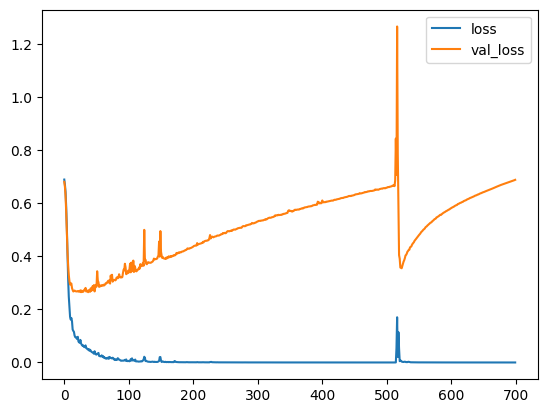

In [16]:
loss.plot()

In [17]:
#üstte overfit ettiğimiz modeli bu sefer earlystopping ile durduracağız

model=Sequential()

model.add(Dense(30,activation="relu"))
model.add(Dense(30,activation="relu"))
model.add(Dense(30,activation="relu"))
model.add(Dense(30,activation="relu"))

model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer="adam",loss="binary_crossentropy")

earlyStopping=EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=25)
#val_loss degerinde iyileşme yani minimize edilme durumu gözlenmediği zaman 25 epoch boyunca bu böyle olursa fit etme işlemini durduracağız

model.fit(x_train,y_train,epochs=700,validation_data=(x_test,y_test),verbose=1,callbacks=[earlyStopping])




Epoch 1/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.6921 - val_loss: 0.6863
Epoch 2/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6815 - val_loss: 0.6758
Epoch 3/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6671 - val_loss: 0.6573
Epoch 4/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6427 - val_loss: 0.6189
Epoch 5/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5884 - val_loss: 0.5529
Epoch 6/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5041 - val_loss: 0.4563
Epoch 7/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3841 - val_loss: 0.3689
Epoch 8/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2869 - val_loss: 0.3179
Epoch 9/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2363 - val_loss: 0.3134
Epoch 10/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2124 - val_loss: 0.2870
Epoch 11/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1660 - val_loss: 0.2729
Epoch 12/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

In [18]:
loss2=pd.DataFrame(model.history.history)
loss2

,loss,val_loss
0,0.689926,0.686251
1,0.678941,0.675832
2,0.661761,0.657324
3,0.633107,0.618905
4,0.574266,0.552855
5,0.478575,0.456343
6,0.361342,0.368923
7,0.260950,0.317907
8,0.211855,0.313403
9,0.194358,0.286991


<Axes: >

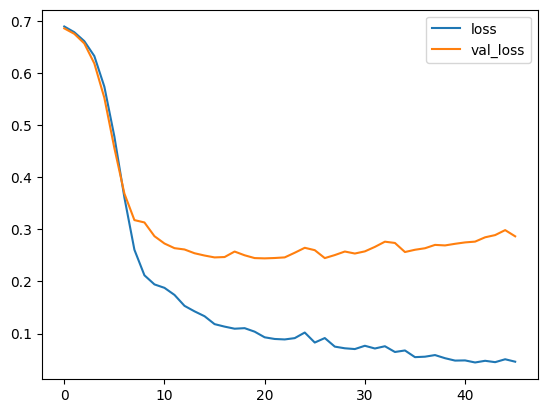

In [20]:
loss2.plot()
#bi nebze de olsa birbirine yaklaştı ve azaldı

In [24]:
model=Sequential()

#dropout a 0 dersen hiç etkili olmaz 1 dersen hepsine uygular
model.add(Dense(units=30,activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(units=30,activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(units=30,activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(units=30,activation="relu"))
model.add(Dropout(0.6))


model.add(Dense(units=1,activation="sigmoid"))

model.compile(optimizer="adam",loss="binary_crossentropy")

model.fit(x_train,y_train,epochs=700,validation_data=(x_test,y_test),verbose=1,callbacks=[earlyStopping])

Epoch 1/700


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.6998 - val_loss: 0.6846
Epoch 2/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6780 - val_loss: 0.6807
Epoch 3/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6900 - val_loss: 0.6779
Epoch 4/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6921 - val_loss: 0.6762
Epoch 5/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6773 - val_loss: 0.6743
Epoch 6/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6805 - val_loss: 0.6720
Epoch 7/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6618 - val_loss: 0.6700
Epoch 8/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6582 - val_loss: 0.6682
Epoch 9/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6850 - val_loss: 0.6663
Epoch 10/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6821 - val_loss: 0.6645
Epoch 11/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6904 - val_loss: 0.6622
Epoch 12/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6755 - val_l

<Axes: >

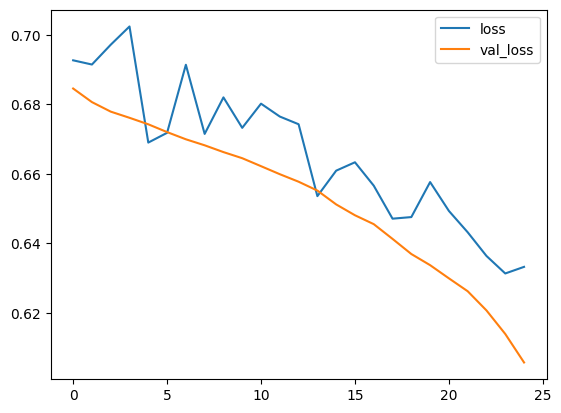

In [25]:
loss3=pd.DataFrame(model.history.history)
loss3.plot()

In [28]:
#x test i model ile tahmin edip vereceği sonuçlara bakalım

prediction=model.predict(x_test)
predictedClasses=np.argmax(prediction,axis=-1)
predictedClasses

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64)

In [29]:
#classification report ile gerçek değerlerimiz ve tahmin degerlerini karsilastiralim

from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predictedClasses))


              precision    recall  f1-score   support

           0       0.61      1.00      0.76       110
           1       0.00      0.00      0.00        71

    accuracy                           0.61       181
   macro avg       0.30      0.50      0.38       181
weighted avg       0.37      0.61      0.46       181



c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [30]:
print(confusion_matrix(y_test,predictedClasses))

[[110   0]
 [ 71   0]]
